In [1]:
import re
import pandas as pd

In [2]:
df = pd.read_csv('/Users/nkazimulobuthelezi/Downloads/Eighty20 Data Engineering Challenge/Q1_birthday_challenge.txt',
           sep='\t')
df.head()

,date of birth,number of people
0,1900_01_01,8
1,1900_01_02,1
2,1900_01_04,1
3,1900_01_06,1
4,1900_01_10,1


#### Date column is an object type, and no missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29814 entries, 0 to 29813
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date of birth     29814 non-null  object
 1   number of people  29814 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 466.0+ KB


In [4]:
#minimum no. of people born in a single day == 1, which might mean there isn't a date for 0 births
# we should rather create a date range to fill missing dates with 0 counts
df.describe()

,number of people
count,29814.000000
mean,69.355974
std,64.154373
min,1.000000
25%,14.000000
50%,47.000000
75%,120.000000
max,541.000000


In [5]:
print(f"""Min date of birth = {df['date of birth'].min()},
          Max date of birth = {df['date of birth'].max()},
          Unique date of births = {len(df['date of birth'].unique())},
          Total rows = {df['date of birth'].count()}""")

Min date of birth = 1900_01_01,
          Max date of birth = 1999_12_20,
          Unique date of births = 29813,
          Total rows = 29814


#### We have duplicate dates/records, the data suggests this should be the aggregate field, therefore should be unique

In [6]:
df[df.duplicated()]

,date of birth,number of people
402,1903_01_21,1


In [7]:
df[df['date of birth']=='1903_01_21']

,date of birth,number of people
401,1903_01_21,1
402,1903_01_21,1


In [8]:
#assuming this is the prefered date format
#we'll validate against it using re, before casting to correct python type
def str_date_format_validation(str_date):
    re_object = re.match("([1][9]\d{2}[\_]\d{2}[\_][0123]\d)", str_date)
    if re_object is None:
        return 0
    else:
        return 1

In [9]:
df['is_valid_date'] = df.apply(lambda row: str_date_format_validation(row['date of birth']), axis=1)

In [10]:
#the date format is consistent, this can then be parsed to python date type
df.is_valid_date.unique()

array([1])

In [11]:
#drop dulicates
df.drop_duplicates(inplace=True)

In [12]:
df.skew()

date of birth       0.018422
number of people    0.968029
is_valid_date       0.000000
dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

df['date of birth'].hist()

In [14]:
max(df['date of birth'])

'1999_12_20'

In [15]:
'1999_12_20'.replace('_', '-')

'1999-12-20'

In [16]:
pd.date_range(start="2018-09-09",end="2020-02-02")

DatetimeIndex(['2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18',
               ...
               '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02'],
              dtype='datetime64[ns]', length=512, freq='D')

In [17]:
min(df['date of birth']), max(df['date of birth'])

('1900_01_01', '1999_12_20')

In [18]:
dates = pd.date_range(start='1900-01-01',end='1999-12-20')
dates

DatetimeIndex(['1900-01-01', '1900-01-02', '1900-01-03', '1900-01-04',
               '1900-01-05', '1900-01-06', '1900-01-07', '1900-01-08',
               '1900-01-09', '1900-01-10',
               ...
               '1999-12-11', '1999-12-12', '1999-12-13', '1999-12-14',
               '1999-12-15', '1999-12-16', '1999-12-17', '1999-12-18',
               '1999-12-19', '1999-12-20'],
              dtype='datetime64[ns]', length=36513, freq='D')

In [19]:
dates_df = pd.DataFrame(dates, columns=['reference_date'])
dates_df.reference_date = dates_df.reference_date.astype(str)
dates_df.head(10)

,reference_date
0,1900-01-01
1,1900-01-02
2,1900-01-03
3,1900-01-04
4,1900-01-05
5,1900-01-06
6,1900-01-07
7,1900-01-08
8,1900-01-09
9,1900-01-10


In [20]:
dates_df['reference_date'] = dates_df.apply(lambda row: row['reference_date'].replace('-', '_'), axis=1)
dates_df

In [22]:
dates_df = dates_df.merge(df, how='left',left_on=['reference_date'], right_on=['date of birth'])
dates_df['number of people'] = dates_df['number of people'].fillna(0)
dates_df['is_valid_date'] = dates_df['is_valid_date'].fillna(1)
df = dates_df.copy()

In [23]:
df.drop('date of birth', axis=1, inplace=True)

In [24]:
df.rename({'reference_date':'date of birth'}, axis=1, inplace=True)

In [25]:
df['number of people'] = df['number of people'].astype(int)
df['is_valid_date'] = df['is_valid_date'].astype(int)

In [26]:
df['birth_year'] = df['date of birth'].apply(lambda row: row[:4])

In [27]:
df_group = df.groupby('birth_year').sum('number of people').rename({'number of people':'no of birthdays'}, axis=1)
df_group.reset_index(inplace=True)
df_group

,birth_year,no of birthdays,is_valid_date
0,1900,127,365
1,1901,175,365
2,1902,205,365
3,1903,262,365
4,1904,377,366
...,...,...,...
95,1995,12,365
96,1996,21,366
97,1997,19,365
98,1998,37,365


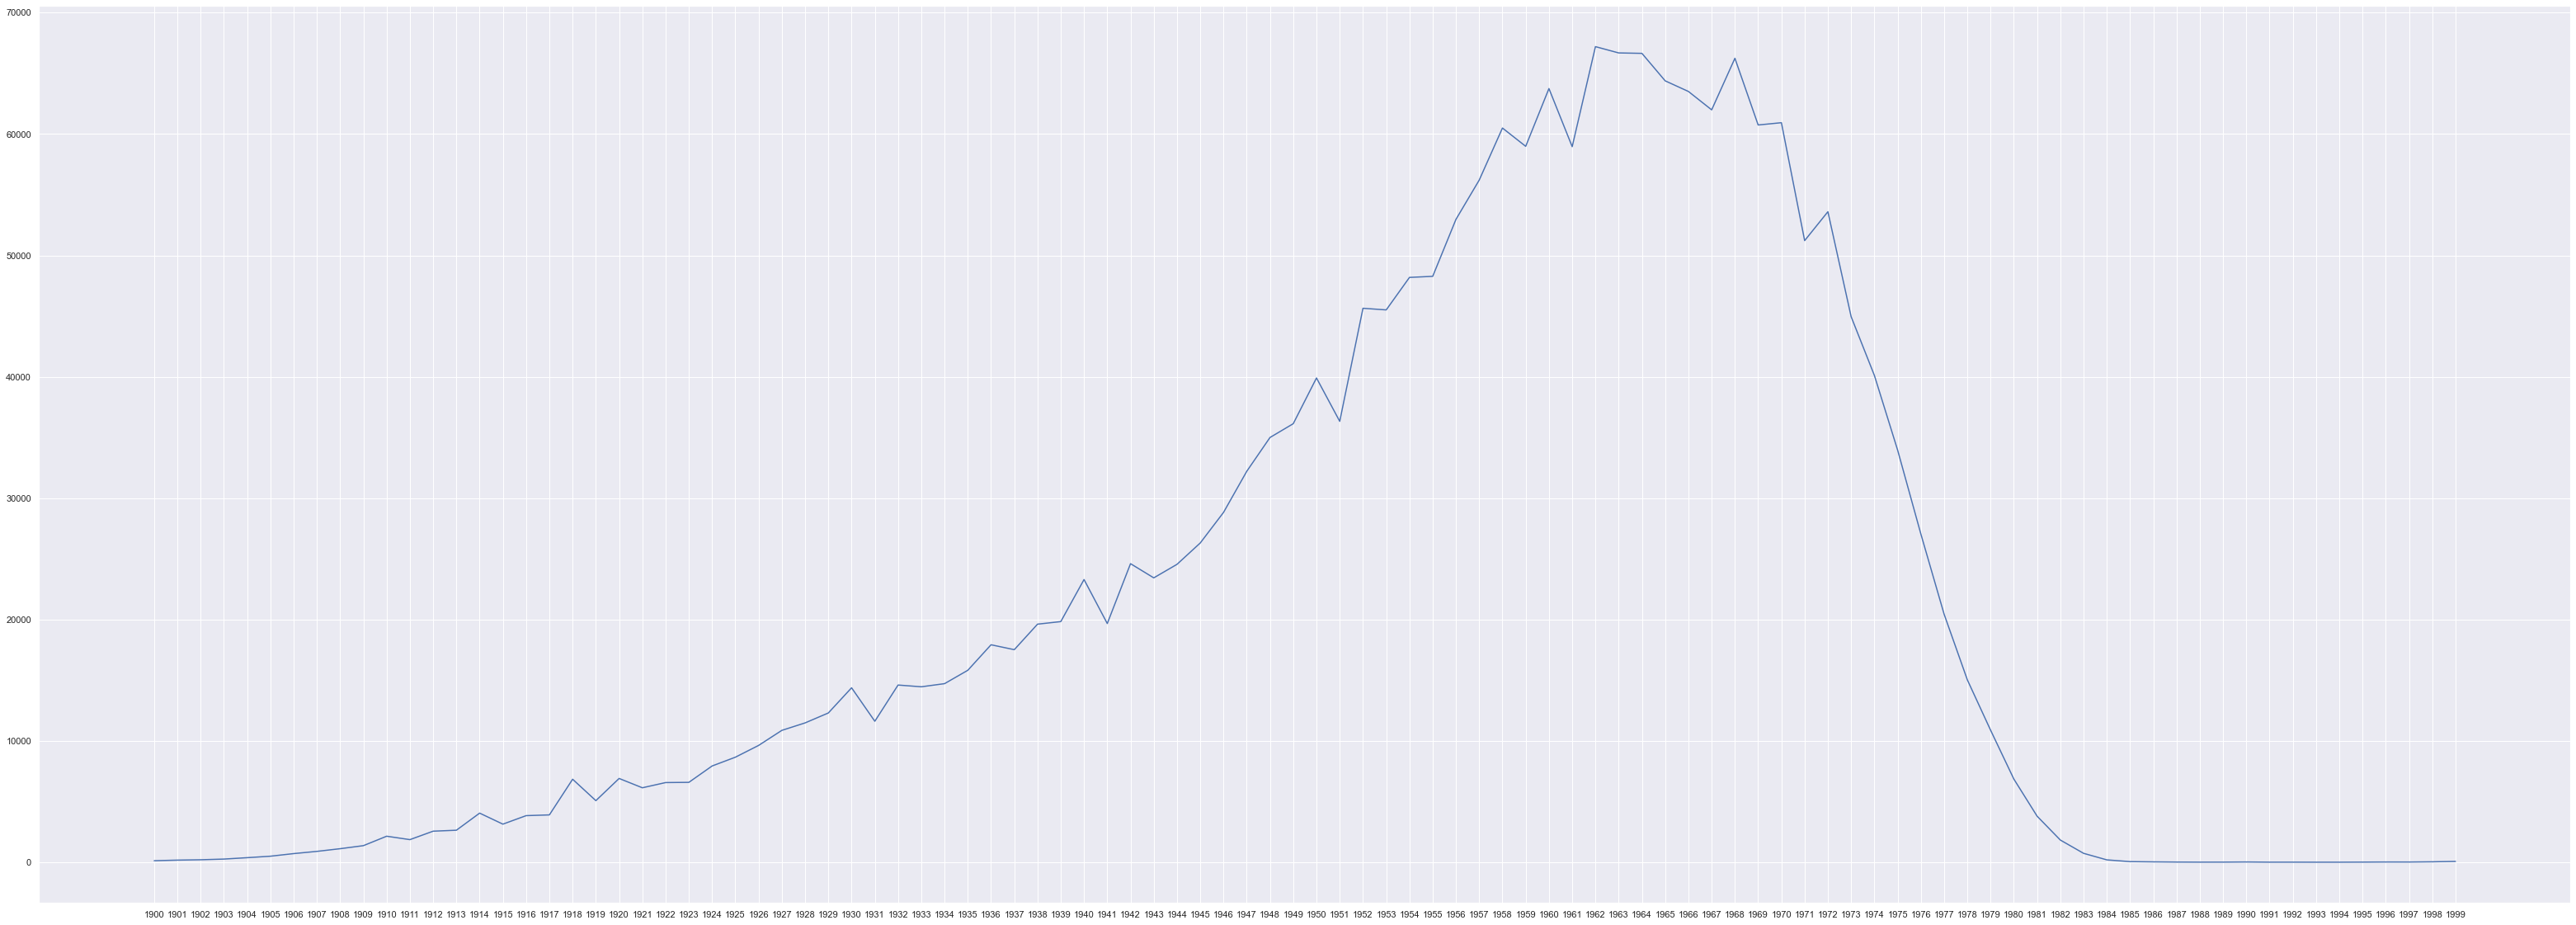

In [28]:
#distribution of birth
plt.figure(figsize=(55, 20))
plt.plot(df_group['birth_year'], df_group['no of birthdays'])